# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable.
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or
<a href="http://www.google.com">Google</a><br>

# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://www.youtube.com/watch?v=Y5yLDcayXIc


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [9]:
def data_parser():
  import pandas as pd
  import numpy as np

  ddf = pd.read_csv("Heart_Disease_Mortality_Data_Among_US_Adults__35___by_State_Territory_and_County___2019-2021.csv")

  ddf.rename(columns = {"Stratification1" : "Gender"},inplace = True)
  ddf.rename(columns = {"Stratification2" : "Ethnicity"},inplace = True)
  ddf.rename(columns = {"Data_Value" : "Deaths Per 100,000 population"},inplace = True)
  ddf = ddf.drop(["StratificationCategory1","StratificationCategory2","TopicID","LocationID","Y_lat","X_lon","Georeference",
  "Class","Topic","DataSource","Data_Value_Unit"], axis = 1 )
  ddf = ddf.sort_values(by = ["LocationAbbr","GeographicLevel","Ethnicity","Gender"],ascending = [True, False,True,False])
  ddf = ddf.reset_index()
  ddf = ddf.drop("index",axis = 1)

  ethn_avg = ddf.groupby(["Ethnicity"])["Deaths Per 100,000 population"].mean()

  def replacemissing(row):
    if row["Data_Value_Footnote"] == "Insufficient Data":
      try:
        state_avg = ddf[
            (ddf["GeographicLevel"] == "State") &
            (ddf["Ethnicity"] == row["Ethnicity"]) &
            (ddf["Gender"] == row["Gender"]) &
            (ddf["LocationAbbr"] == row["LocationAbbr"])
        ].iloc[0]
        return state_avg["Deaths Per 100,000 population"]
      except IndexError:
        return ethn_avg[row["Ethnicity"]]
    else:
      return row["Deaths Per 100,000 population"]

  ddf["Deaths Per 100,000 population"] = ddf.apply(lambda row: replacemissing(row),axis = 1)
  ddf = ddf[ddf["GeographicLevel"] != "State"]
  ddf = ddf.drop(["Data_Value_Type","Data_Value_Footnote_Symbol","Data_Value_Footnote"], axis = 1)

  ddf.to_csv("cleaned_heart_disease_mortality.csv",index = False)

  return ddf






############ Function Call ############
data_parser()

,Year,LocationAbbr,LocationDesc,GeographicLevel,"Deaths Per 100,000 population",Gender,Ethnicity
24,2020,AK,Nome,County,561.7,Overall,American Indian or Alaska Native
25,2020,AK,Bristol Bay,County,442.5,Overall,American Indian or Alaska Native
26,2020,AK,Southeast Fairbanks,County,326.6,Overall,American Indian or Alaska Native
27,2020,AK,Hoonah-Angoon,County,408.5,Overall,American Indian or Alaska Native
28,2020,AK,Yukon-Koyukuk,County,289.1,Overall,American Indian or Alaska Native
...,...,...,...,...,...,...,...
78787,2020,WY,Goshen County,County,213.0,Female,White
78788,2020,WY,Uinta County,County,311.2,Female,White
78789,2020,WY,Teton County,County,152.8,Female,White
78790,2020,WY,Park County,County,242.5,Female,White


## Web Collection Requirement \#1


In [2]:
%pip install selenium
%pip install webdriver_manager
!apt-get update
!apt-get install -y wget unzip
!wget https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt --fix-broken install -y

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 481.7/481.7 kB 22.2 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,192 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,626 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com

In [8]:
def web_parser1():
  import pandas as pd
  import numpy as np
  import re
  from selenium import webdriver
  from selenium.webdriver.common.by import By
  from selenium.webdriver.support.ui import Select
  from selenium.webdriver.chrome.service import Service
  from selenium.webdriver.chrome.options import Options
  from webdriver_manager.chrome import ChromeDriverManager
  import time

  chrome_options = Options()
  chrome_options.add_argument('--headless')
  chrome_options.add_argument('--no-sandbox')
  chrome_options.add_argument('--disable-dev-shm-usage')
  chrome_options.add_argument('--disable-gpu')

  driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()), options=chrome_options)
  url = 'https://nccd.cdc.gov/DHDSPAtlas/Reports.aspx'
  driver.get(url)

  time.sleep(2)

  driver.find_element(By.XPATH, "//a[@href='#tabReport2']").click()

  time.sleep(2)

  select = Select(driver.find_element(By.ID, '2_theme_select'))
  select.select_by_visible_text('Median Household Income ($)')

  time.sleep(2)

  driver.find_element(By.ID, 'btn_2_report_submit').click()

  time.sleep(6) #can possibly lower

  table_element = driver.find_element(By.ID, 'report_sd_table')

  table_html = table_element.get_attribute('outerHTML')

  df = pd.read_html(table_html)[0]

  insuf_table_element = driver.find_element(By.ID, 'insufficientData_sd_table')

  insuf_table_html = insuf_table_element.get_attribute('outerHTML')

  insuf_df = pd.read_html(insuf_table_html)[0]

  driver.quit()

  # return df
  df_income = pd.concat([df, insuf_df], ignore_index = True)
  df_income = df_income.drop('Unnamed: 3', axis = 1)

  ## inconsistency 1 - additional char
  df_income['Category Range'] = df_income['Category Range'].str.replace(r'\(\d\d*\)', '', regex = True)
  # return df_income

  ## inconsistency 3.1 - replace 'Insufficient Data' in Value with NaN
  df_states = extra_source1()
  state_income_map = df_states.set_index('State or territory')['Median household income (2019), ACS[10]'].to_dict()

  def replace_value(row):
    if row['Value'] == 'Insufficient Data':
      income = state_income_map.get(row['State'], np.nan)
      if re.match(r"\$", income):
          income = int(income.replace("$", "").replace(",", ""))
      return income
    return row['Value']

  df_income['Value'] = df_income.apply(replace_value, axis = 1)
  # return df_income

  ## inconsistency 3.2 - replace 'Insufficient Data' in Catagory Range with state avg
  df_states = extra_source1()

  state_income_map = df_states.set_index('State or territory')['Median household income (2019), ACS[10]'].to_dict()

  def replace_category_range(row):
    if row['Category Range'].strip() == 'Insufficient Data':
      return f"{state_income_map.get(row['State'], 'N/A')}"
    return row['Category Range']

  df_income['Category Range'] = df_income.apply(replace_category_range, axis = 1)
  df_income = df_income.drop("Category Range",axis = 1)
  df_income.to_csv("cleaned_median_income.csv",index = False)
  return df_income

############ Function Call ############
web_parser1()

<ipython-input-8-4683d12f2803>:42: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(table_html)[0]
<ipython-input-8-4683d12f2803>:48: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  insuf_df = pd.read_html(insuf_table_html)[0]
<ipython-input-6-fe6f04764705>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html((str(table)))[3]
<ipython-input-6-fe6f04764705>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html((str(table)))[3]


,County,State,Value
0,McDowell,WV,29000
1,Buffalo,SD,31000
2,East Carroll,LA,31000
3,Holmes,MS,32000
4,Humphreys,MS,33000
...,...,...,...
3221,Yabucoa,PR,20474
3222,Yauco,PR,20474
3223,Saint Croix (County Equivalent),VI,37254
3224,Saint John (County Equivalent),VI,37254


## Web Collection Requirement #2

In [4]:
def web_parser2():
  import requests
  import pandas as pd
  import numpy as np

  url = "https://apps.bea.gov/api/data/?UserID=80BEF102-7B1D-4714-BA8D-7D4D45AC07A9&method=GetData&datasetname=Regional&TableName=CAGDP2&LineCode=1&Year=2020&GeoFips=COUNTY&ResultFormat=json"
  resp = requests.get(url)
  data = resp.json()

  wdf = pd.DataFrame(data['BEAAPI']['Results']['Data'])
  wdf = wdf.drop(["Code","UNIT_MULT","NoteRef"],axis = 1)

  split = wdf["GeoName"].str.split(", ", expand=True)
  wdf["County"] = split[0]
  wdf["State"] = split[1]
  wdf = wdf.drop("GeoName",axis = 1)
  wdf = wdf.iloc[:,[0,1,4,5,3,2]]
  wdf.to_csv("cleaned_county_gdp.csv",index = False)

  return wdf




############ Function Call ############
web_parser2()

,GeoFips,TimePeriod,County,State,DataValue,CL_UNIT
0,01001,2020,Autauga,AL,1841867,Thousands of dollars
1,01003,2020,Baldwin,AL,8770138,Thousands of dollars
2,01005,2020,Barbour,AL,787697,Thousands of dollars
3,01007,2020,Bibb,AL,502089,Thousands of dollars
4,01009,2020,Blount,AL,973485,Thousands of dollars
...,...,...,...,...,...,...
3113,56037,2020,Sweetwater,WY,3403365,Thousands of dollars
3114,56039,2020,Teton,WY,2851799,Thousands of dollars
3115,56041,2020,Uinta,WY,820273,Thousands of dollars
3116,56043,2020,Washakie,WY,362761,Thousands of dollars


Additional Dataset Parsing/Cleaning Functions

In [5]:
%pip install us

In [6]:
def extra_source1():
  import pandas as pd
  import numpy as np
  import requests
  from bs4 import BeautifulSoup
  import us

  wiki_url = 'https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income'

  response = requests.get(wiki_url)
  soup = BeautifulSoup(response.content, 'html.parser')

  table = soup.findAll('table', {'class': 'wikitable'})

  df = pd.read_html((str(table)))[3]

  abbv = us.states.mapping('name', 'abbr')
  abbv['Washington, D.C.'] = 'DC'
  df['State or territory'] = df['State or territory'].replace('U.S. Virgin Islands', 'Virgin Islands')
  df['State or territory'] = df['State or territory'].replace(abbv)

  df = df[['State or territory', 'Median household income (2019), ACS[10]']]


  df.to_csv("cleaned_states_median_income.csv", index = False)
  return df

############ Function Call ############
extra_source1()

<ipython-input-6-fe6f04764705>:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html((str(table)))[3]


,State or territory,"Median household income (2019), ACS[10]"
0,United States,"$65,712"
1,DC,"$92,266"
2,MA,"$85,843"
3,CT,"$78,833"
4,NJ,"$85,751"
5,MD,"$86,738"
6,NY,"$72,108"
7,WA,"$78,687"
8,NH,"$77,933"
9,CO,"$77,127"


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. The first inconsistency was removing additional characters (###) at the end of the string for the category range column in the HTML data. These characters are useless and impose on the useful data, so we got rid of them by using .replace() and regex to replace them with nothing.


2. In the downloaded dataset, there are multiple nan values in the Data_Value column which was due to insufficient data to report accurately for that county. In order to deal with this inconsistency we decided that the best course of action was to use the state average for that ethnicity and gender to get the best approximation. However, there were also some states that had insufficient data to report for a specific ethnicity and gender. Therefore for the remaining counties that still had nan values, we decided the best approach was to use the average of that ethnicity specifically to fill in the data.

3. In the HTML dataset, there is  “Insufficient Data” in the Value and Category Range columns. The Value is the data that we will use to analyze with the other datasets, so we decided to replace the "Insufficient Data" with the average state median income via data scraped from a Wikipedia table using a function with if-return statements and .apply(). Initally, we did the same process for the Category Range column, but then decided that the data in the column is not necessary for our project and removed it using .drop().

4. In the additional Wikipedia dataset, the State or territory column had the full name of each state/territory, which made it difficult to add the necessary data to replace the "Insufficient Data". By importing us, we were able to easily change each state name into their abbreviated versions by using masking and .replace().


5. While working with the API we noticed that one of the values that it was reporting out on was the GeoName of that area. However, this GeoName contained both the county and the state which was inconsistent with all of our other datasets which had the county and state separate. Therefore, we decided that it would be best to split this column up based on the comma, and return two separate columns named County and State to better match up with our other datasets for later analysis.



## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source: https://catalog.data.gov/dataset/heart-disease-mortality-data-among-us-adults-35-by-state-territory-and-county-2019-2021

*   Web Collection #1 Source: https://nccd.cdc.gov/DHDSPAtlas/Reports.aspx
*   Web Collection #2 Source: https://apps.bea.gov/api/data/?UserID=80BEF102-7B1D-4714-BA8D-7D4D45AC07A9&method=GetData&datasetname=Regional&TableName=CAGDP2&LineCode=1&Year=2020&GeoFips=COUNTY&ResultFormat=json  

*   Web Collection #3 Source: https://en.wikipedia.org/wiki/List_of_U.S._states_and_territories_by_income



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function.

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit.

# Topic Summary

Please provide a brief executive summary (5 sentences or less) discussing your topic:

## Insights

In [11]:
def insight1():
  import pandas as pd

  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  median_income_df = pd.read_csv("cleaned_median_income.csv")
  gdp_df = pd.read_csv("cleaned_county_gdp.csv")

  heart_disease_df = heart_disease_df[heart_disease_df['Gender'] == 'Overall']

  heart_disease_df['LocationDesc'] = heart_disease_df['LocationDesc'].str.replace(' County', '')


  merged_df1 = pd.merge(heart_disease_df, median_income_df, left_on =['LocationAbbr', 'LocationDesc'] ,right_on= ['State','County'])
  merged_df2 = pd.merge(gdp_df, heart_disease_df,left_on = ['State','County'], right_on = ['LocationAbbr','LocationDesc'])
  merged_df3 = pd.merge(gdp_df, median_income_df, on=['State','County'])

  gdp_income_correlation = merged_df3['DataValue'].corr(merged_df3['Value'])
  correlation_income = merged_df1['Deaths Per 100,000 population'].corr(merged_df1['Value'])
  correlation_gdp = merged_df2['Deaths Per 100,000 population'].corr(merged_df2['DataValue'])

  print(f"Correlation between GDP and Median Income: {gdp_income_correlation}")
  print(f"Correlation between Median Income and Heart Disease Deaths: {correlation_income}")
  print(f"Correlation between GDP and Heart Disease Deaths: {correlation_gdp}")



############ Function Call ############
insight1()

Correlation between GDP and Median Income: 0.2856338081942725
Correlation between Median Income and Heart Disease Deaths: -0.14514628878247068
Correlation between GDP and Heart Disease Deaths: -0.03364102420403973


### Insight 1 Explanation

This insight uses the Pearson correlation coefficient to see if there is a negative or positive correlation. This shows a moderate link between economic growth and household income. However the main insight we were looking for was the correlation between heart disease deaths and gdp or median incomes and we see that it is a small negative correlation which shows that while it does play a part in determining heart disease mortalities, other factors likely contribute more to it. This is surprising since we believed that communities with greater access to healthier lifestyles and better healthcare options then it would lead to less deaths from heart disease.



In [10]:
def insight2():
  import pandas as pd

  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  avg_death_ethnicity = heart_disease_df.groupby('Ethnicity')['Deaths Per 100,000 population'].mean()

  avg_death_all_ethnicity = heart_disease_df['Deaths Per 100,000 population'].mean()

  diff = avg_death_ethnicity - avg_death_all_ethnicity
  diff_formatted = diff.apply(lambda x: f'+{x:.2f}' if x > 0 else f'{x:.2f}')


  compare = pd.DataFrame({'Average Deaths': avg_death_ethnicity, 'Difference from Overall': diff_formatted})

  print(compare)
  print(f"The overall average for all ethnicities is {avg_death_all_ethnicity}")

############ Function Call ############
insight2()

                                           Average Deaths  \
Ethnicity                                                   
American Indian or Alaska Native               262.578918   
Asian                                          166.418831   
Black                                          451.810446   
Hispanic                                       184.976855   
More than one race                             123.013156   
Native Hawaiian or Other Pacific Islander      412.342639   
Overall                                        368.701302   
White                                          377.647502   

                                          Difference from Overall  
Ethnicity                                                          
American Indian or Alaska Native                           -25.66  
Asian                                                     -121.82  
Black                                                     +163.58  
Hispanic                                         

### Insight 2 Explanation

This insight reveals the average death rate for each ethnicity and compares it to the overall average death rate across all ethnicities. We can see that Blacks and Native Hawaiian or other Pacific Islander have the most deaths on average while those with more than one race and Asians have the least amount of deaths on average.

In [12]:
def insight3():
  import pandas as pd

  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  median_income_df = pd.read_csv("cleaned_median_income.csv")

  heart_disease_df = heart_disease_df[heart_disease_df['Gender'] == 'Overall']
  heart_disease_df['LocationDesc'] = heart_disease_df['LocationDesc'].str.replace(' County', '')

  merged_df = pd.merge(heart_disease_df, median_income_df, left_on=['LocationAbbr', 'LocationDesc'], right_on=['State', 'County'])

  income_brackets = [0, 30000, 50000, 70000, 90000, float('inf')]
  bracket_labels = ['<30k', '30k-50k', '50k-70k', '70k-90k', '90k+']

  merged_df['Income Bracket'] = pd.cut(merged_df['Value'].astype(float), bins=income_brackets, labels=bracket_labels)

  deaths_by_bracket = merged_df.groupby('Income Bracket')['Deaths Per 100,000 population'].count()

  print(deaths_by_bracket)






############ Function Call ############
insight3()

Income Bracket
<30k           7
30k-50k     4160
50k-70k    11721
70k-90k     4066
90k+        1395
Name: Deaths Per 100,000 population, dtype: int64


<ipython-input-12-5623b24984c3>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_by_bracket = merged_df.groupby('Income Bracket')['Deaths Per 100,000 population'].count()


### Insight 3 Explanation

This insight shows how many deaths were in what income bracket and we can see that most of the deaths are within the 50k - 70k income range. This might be due to the fact that more counties have this income bracket and thus leads to more data being concentrated in this income bracket. However, this neither supports nor denies our claim since it seems to be a fairly even distribution and only one income bracket really suffers more than the others.



In [13]:
def insight4():
  import pandas as pd


  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  median_income_df = pd.read_csv("cleaned_median_income.csv")
  gdp_df = pd.read_csv("cleaned_county_gdp.csv")

  heart_disease_df = heart_disease_df[heart_disease_df['Gender'] == 'Overall']
  heart_disease_df['LocationDesc'] = heart_disease_df['LocationDesc'].str.replace(' County', '')

  merged_df1 = pd.merge(heart_disease_df, median_income_df, left_on=['LocationAbbr', 'LocationDesc'], right_on=['State', 'County'])
  merged_df2 = pd.merge(merged_df1, gdp_df, on=['State', 'County'])

  income_brackets = [0, 30000, 50000, 70000, 90000, float('inf')]
  bracket_labels = ['<30k', '30k-50k', '50k-70k', '70k-90k', '90k+']
  merged_df2['Median Income Bracket'] = pd.cut(merged_df2['Value'].astype(float), bins=income_brackets, labels=bracket_labels)

  gdp_brackets = [0, 1000000, 5000000, 10000000, 50000000, float('inf')]
  gdp_bracket_labels = ['<1M', '1M-5M', '5M-10M', '10M-50M', '50M+']
  merged_df2['GDP Bracket'] = pd.cut(merged_df2['DataValue'].astype(float), bins=gdp_brackets, labels=gdp_bracket_labels)

  death_rates_median = merged_df2.groupby('Median Income Bracket')['Deaths Per 100,000 population'].mean().reset_index()
  death_rates_median = death_rates_median.rename(columns={'Deaths Per 100,000 population': 'Average Death Rate'})

  death_rates_gdp = merged_df2.groupby('GDP Bracket')['Deaths Per 100,000 population'].mean().reset_index()
  death_rates_gdp = death_rates_gdp.rename(columns={'Deaths Per 100,000 population': 'Average Death Rate'})

  print(death_rates_median)
  print(death_rates_gdp)

############ Function Call ############
insight4()

  Median Income Bracket  Average Death Rate
0                  <30k          314.060000
1               30k-50k          311.196629
2               50k-70k          283.003418
3               70k-90k          257.356550
4                  90k+          228.958062
  GDP Bracket  Average Death Rate
0         <1M          290.223025
1       1M-5M          279.461742
2      5M-10M          266.911211
3     10M-50M          249.287586
4        50M+          249.582828


<ipython-input-13-82d1a2a8182b>:23: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rates_median = merged_df2.groupby('Median Income Bracket')['Deaths Per 100,000 population'].mean().reset_index()
<ipython-input-13-82d1a2a8182b>:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  death_rates_gdp = merged_df2.groupby('GDP Bracket')['Deaths Per 100,000 population'].mean().reset_index()


### Insight 4 Explanation

This insight organizes the median household income and GDP of each county into brackets and show us the average death rate of each respective bracket. In the median income backet table, the greater the income the less deaths there are, with the smallest income having an average of 314.06 deaths and the greatest having 228.96 deaths. The GDP bracket table is similar, the greater the income the less deaths there are, but the difference in averages of the smallest and greatest brackets are not as far away from each other. The smallest GDP has an averge death rate of 290.22 deaths and the greatest has 249.58 deaths.

In [14]:
def insight5():
  import pandas as pd

  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  median_income_df = pd.read_csv("cleaned_median_income.csv")
  gdp_df = pd.read_csv("cleaned_county_gdp.csv")


  heart_disease_df['LocationDesc'] = heart_disease_df['LocationDesc'].str.replace(' County', '')
  merged_df = pd.merge(heart_disease_df, median_income_df, left_on=['LocationAbbr', 'LocationDesc'], right_on=['State', 'County'])
  merged_df = pd.merge(merged_df, gdp_df, on=['State', 'County'])
  merged_df = merged_df[merged_df['Gender'] == 'Overall']
  merged_df = merged_df[merged_df['Ethnicity'] == 'Overall']

  top = merged_df.sort_values(by='Deaths Per 100,000 population').head(10)
  bottom = merged_df.sort_values(by='Deaths Per 100,000 population').tail(10)

  minmax = pd.concat([top, bottom])
  minmax = minmax.drop(['Year','GeographicLevel','Gender','Ethnicity','County','State' ,'GeoFips','TimePeriod','CL_UNIT'], axis = 1)
  minmax = minmax.rename(columns= {'Value' : 'Median Household Income', 'DataValue' : 'County GDP' })
  minmax = minmax.iloc[:,[1,0,2,3,4]]
  return minmax

############ Function Call ############
insight5()

,LocationDesc,LocationAbbr,"Deaths Per 100,000 population",Median Household Income,County GDP
6261,Summit,CO,69.9,97000,2704332
6241,Eagle,CO,99.8,106000,4333642
6227,Routt,CO,108.9,104000,2019949
6268,Pitkin,CO,113.1,111000,2330276
71099,Teton,WY,156.3,128000,2851799
6235,San Miguel,CO,156.3,94000,656826
8085,Collier,FL,164.6,82000,21892843
6232,Park,CO,164.8,88000,454409
15545,Blaine,ID,165.1,99000,1653439
4829,Marin,CA,173.9,136000,30915224


### Insight 5 Explanation

This insight shows us the counties with the highest and lowest deaths per 100,000 population with their corresponding county GDP and median household income. With this table we see that there really is not a significant enough correlation to conclusively say that lower income and gdp cause heart disease since some counties with low gdps and incomes have the least amount of deaths while othes with high gdps and median incomes have high death rates.


## Data Visualizations

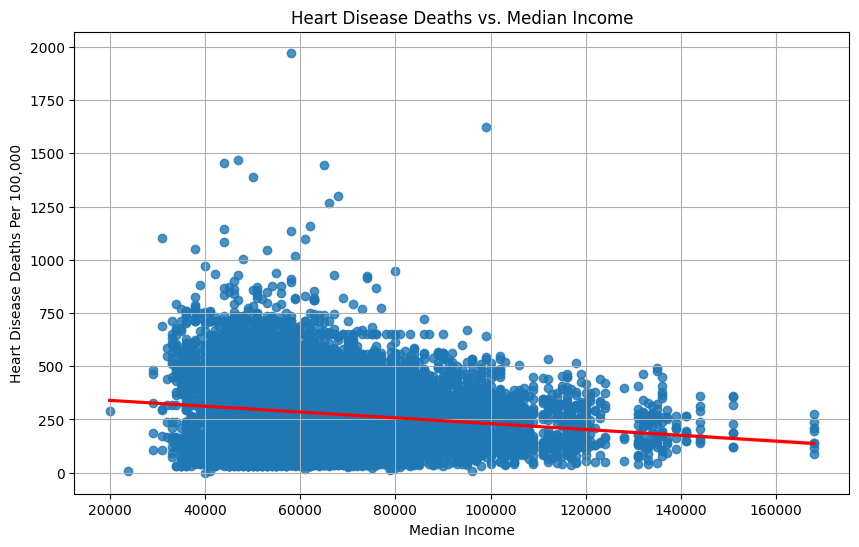

In [15]:
def visual1():
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns

  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  median_income_df = pd.read_csv("cleaned_median_income.csv")

  heart_disease_df = heart_disease_df[heart_disease_df['Gender'] == 'Overall']
  heart_disease_df['LocationDesc'] = heart_disease_df['LocationDesc'].str.replace(' County', '')

  merged_df = pd.merge(heart_disease_df, median_income_df, left_on =['LocationAbbr', 'LocationDesc'] ,right_on= ['State','County'])

  merged_df['Value'] = merged_df['Value'].astype(int)

  plt.figure(figsize=(10,6))
  sns.regplot(x='Value',y='Deaths Per 100,000 population', data = merged_df, line_kws={'color':'red'})
  plt.title('Heart Disease Deaths vs. Median Income')
  plt.xlabel('Median Income')
  plt.ylabel('Heart Disease Deaths Per 100,000')

  plt.grid(True)
  plt.show()







############ Function Call ############
visual1()

### Visualization 1 Explanation

Visualization 1 is a scatter plot with all values of Heart Disease Deaths mapped against Median Income and as you can see there is a negative trend line which shows that as median household income goes up, average death by heart disease goes down however, this value is not statistically significant enough to conclusively prove it.


<ipython-input-16-60286eba8ad9>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  deaths_by_bracket = merged_df.groupby('Income Bracket')['Deaths Per 100,000 population'].count()


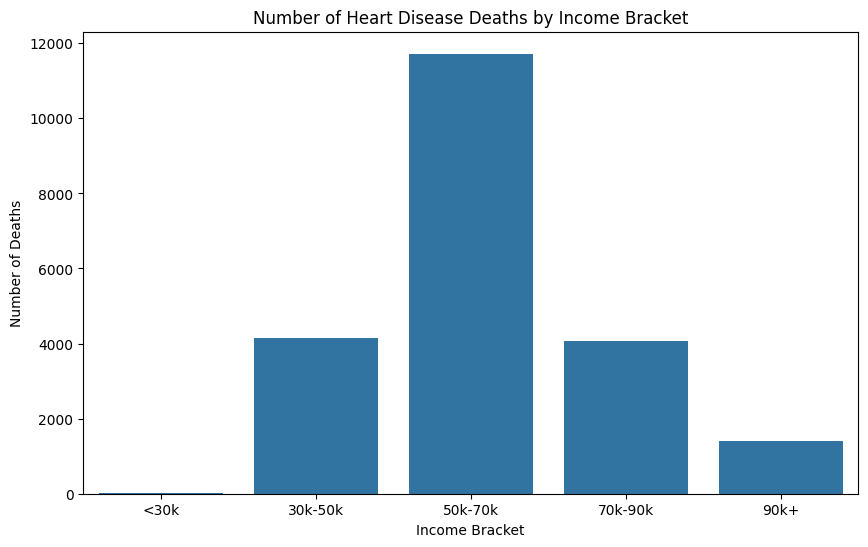

In [16]:
def visual2():
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")
  median_income_df = pd.read_csv("cleaned_median_income.csv")
  heart_disease_df = heart_disease_df[heart_disease_df['Gender'] == 'Overall']
  heart_disease_df['LocationDesc'] = heart_disease_df['LocationDesc'].str.replace(' County', '')
  merged_df = pd.merge(heart_disease_df, median_income_df, left_on=['LocationAbbr', 'LocationDesc'], right_on=['State', 'County'])
  income_brackets = [0, 30000, 50000, 70000, 90000, float('inf')]
  bracket_labels = ['<30k', '30k-50k', '50k-70k', '70k-90k', '90k+']
  merged_df['Income Bracket'] = pd.cut(merged_df['Value'].astype(float), bins=income_brackets, labels=bracket_labels)
  deaths_by_bracket = merged_df.groupby('Income Bracket')['Deaths Per 100,000 population'].count()
  plt.figure(figsize=(10, 6))
  sns.barplot(x=deaths_by_bracket.index, y=deaths_by_bracket.values)
  plt.title('Number of Heart Disease Deaths by Income Bracket')
  plt.xlabel('Income Bracket')
  plt.ylabel('Number of Deaths')
  plt.show()





############ Function Call ############
visual2()

### Visualization 2 Explanation

This is a bar graph with the number of deaths sorted into their respective income brackets to see if there was a negative correlation between the two. As you can see it actually demonstrates a normal curve and this might be due to the fact our dataset is already pulling the median household income and a lot of counties don't have exceptionally high or low median incomes which would cause them to aggregate around the 50k-70k bracket.

In [ ]:
def visual3():
  import pandas as pd
  import plotly.express as px

  heart_disease_df = pd.read_csv("cleaned_heart_disease_mortality.csv")

  heart_disease_df = heart_disease_df[(heart_disease_df["Ethnicity"] == "Overall") & (heart_disease_df["Gender"] == "Overall")]

  fig = px.choropleth(
      heart_disease_df,
      locations='LocationAbbr',
      locationmode='USA-states',
      color='Deaths Per 100,000 population',
      range_color=(0, heart_disease_df['Deaths Per 100,000 population'].max()),
      scope="usa",
      labels={'Deaths Per 100,000 population': 'Heart Disease Death Rate (Thousands)'},
      title='Heart Disease Mortality Rates by States in the US')
  fig.show()







############ Function Call ############
visual3()

### Visualization 3 Explanation

This visualization showcases heart disease rate per 100,000 population and the figure demonstrates to use that heart disease tends to affect more southeast states than other states. This might be due to access to healthcare infrastructure or population density as states such as nebraska have lower rates but also tend to have less infrastructure and income. Therefore we cannot conclusively prove that income or gdp significantly affects heart disease death rates.


# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:

Pandas Merge Documentation - https://pandas.pydata.org/docs/reference/api/pandas.merge.html

Pandas Cut Documentation - https://pandas.pydata.org/docs/reference/api/pandas.cut.html

Seaborn Bar Graph Documentation - https://seaborn.pydata.org/generated/seaborn.barplot.html

Seaborn Scatter plot with regression modeling - https://seaborn.pydata.org/generated/seaborn.regplot.html


# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
